In [2]:
%pip install shap


Defaulting to user installation because normal site-packages is not writeable
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 7.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------- ----- 2.4/2.8 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 12.3 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   --- ------------------------------------ 2.9/38.1 MB 15.3 MB/s eta 0:00:03
   ------ --------------------------------- 6.3/38.1 MB 16.4 MB/s eta 0:00:02
   -------- ------------------------------- 8.1/38.1 MB 13.8 MB/s eta 0:00:03
   ----------- ---------------------------- 11.0/38.1 MB 13.4 MB/s eta 0:00:03
   -------------- ------------------------- 13.6/38.1 MB 13.4 MB/s eta 0:00:02
   --------------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\chouh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import shap


C:\Users\chouh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_csv("../data/raw/creditcard.csv")

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [5]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

feature_importance.head(10)


,Feature,Coefficient
29,Amount,2.367276
1,V1,1.723862
14,V14,-1.494961
4,V4,1.339431
10,V10,-1.334996
5,V5,1.214379
12,V12,-1.127886
16,V16,-0.996376
17,V17,-0.992185
2,V2,0.932075


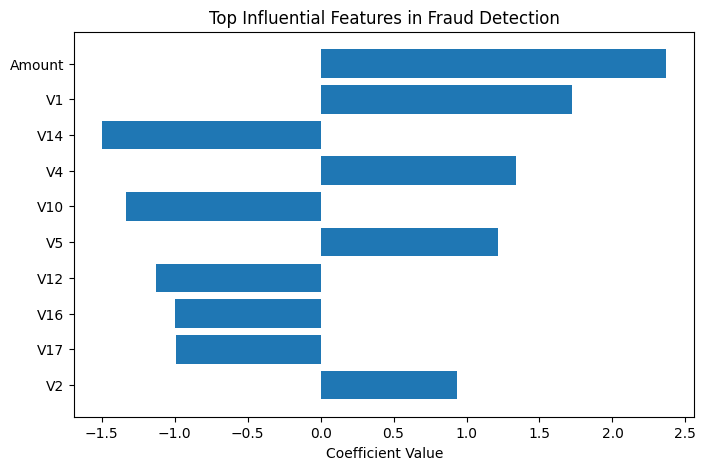

In [6]:
plt.figure(figsize=(8,5))
plt.barh(
    feature_importance["Feature"][:10],
    feature_importance["Coefficient"][:10]
)
plt.xlabel("Coefficient Value")
plt.title("Top Influential Features in Fraud Detection")
plt.gca().invert_yaxis()
plt.show()


In [7]:
explainer = shap.LinearExplainer(model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)


In [8]:
fraud_index = np.where(y_test.values == 1)[0][0]


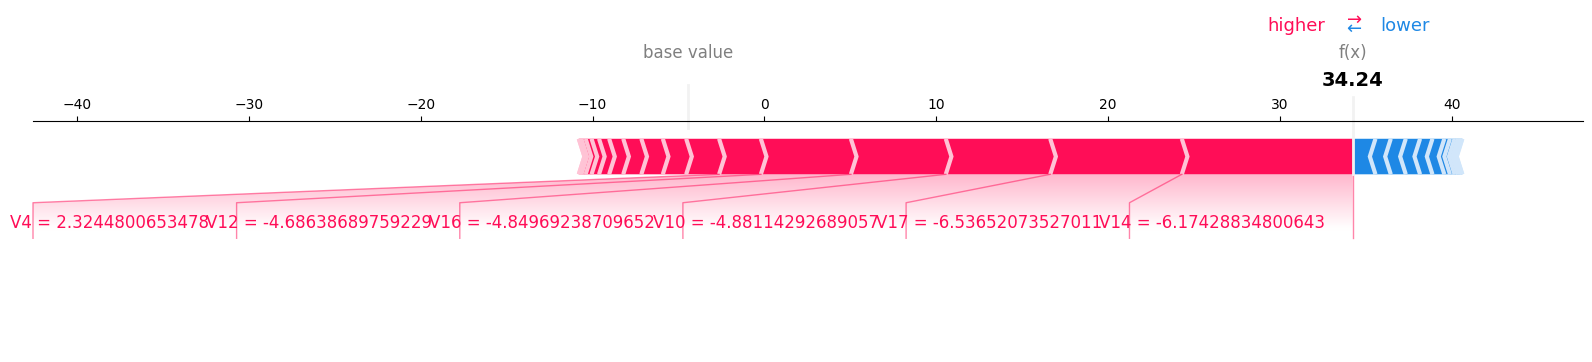

In [9]:
shap.force_plot(
    explainer.expected_value,
    shap_values[fraud_index],
    X_test.iloc[fraud_index],
    matplotlib=True
)
